In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


In [2]:
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import utils
def trait_data(diretory):
    data=pd.read_csv(diretory, sep=";", header=None)
    data = data.rename(columns = {0:"sentences", 1:"classes"})
    x=data['sentences'].values
    y=data['classes']
    le = preprocessing.LabelEncoder()
    y=le.fit_transform(y)
    y=utils.to_categorical(y, num_classes=None, dtype="float32")
    
    return x,y

In [3]:
x_train,y_train=trait_data("../input/emotions-dataset-for-nlp/train.txt")
x_test,y_test=trait_data("../input/emotions-dataset-for-nlp/test.txt")
x_val,y_val=trait_data("../input/emotions-dataset-for-nlp/val.txt")

In [4]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [5]:
print('sentence: {}. Classe:{}'.format(x_train[0], y_train[0]))

sentence: i didnt feel humiliated. Classe:[0. 0. 0. 0. 1. 0.]


In [6]:
# tokenizing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(x_train) 
#tokenizer.fit_on_texts(x_val)
#tokenizer.fit_on_texts(x_test)
#print(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_val = tokenizer.texts_to_sequences(x_val)
sequence_test = tokenizer.texts_to_sequences(x_test)
 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)
padded_val = pad_sequences(sequence_val)

In [7]:
def Turn_in_sequential(padded,y,SEQLEN = 10,STEP=1):
    # SEQLEN - Length of the sequence to predict next char
    #STEP  - stride between two subsequent sequences
    padded=np.array(padded)
    padded=np.array(y)
    
    input_chars = []
    label_chars = []
    
    for i in range(0, len(padded) - SEQLEN, STEP):
        # Append input of size SEQLEN
        input_chars.append(padded[i:SEQLEN+i])
        # Append output (label) of size 1
        label_chars.append(y[i:SEQLEN+i])
    return padded, y


In [8]:
#padded_train, y_train = Turn_in_sequential(padded_train,y_train)
#padded_val, y_val = Turn_in_sequential(padded_val,y_val)
#padded_test, y_test = Turn_in_sequential(padded_test,y_test)

In [9]:
#y_train=y_train.reshape(-1,1)
#y_val=y_val.reshape(-1,1)
#y_test=y_test.reshape(-1,1)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten
from tensorflow import optimizers


lr=1e-3
# build up model

model = Sequential([
                    Embedding(input_dim=5000, output_dim=16),
                    LSTM(64),
                    Flatten(),
                    Dense(1000, activation='relu'),
                    Dense(200, activation='relu'),
                    Dense(50, activation='relu'),
                    Dense(25, activation='relu'),
                    Dense(6, activation='sigmoid')])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          80000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                20736     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1000)              65000     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               200200    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1

In [11]:
from keras.callbacks import EarlyStopping

# membuat early stopping
es = EarlyStopping(monitor = 'val_loss',
                   verbose = 1e-3,
                   patience = 2,
                   mode = 'min',
                   restore_best_weights = True)

# training model

history = model.fit(padded_train, 
                    y_train,
                    epochs = 15,
                    validation_data = (padded_val, y_val),
                    shuffle=True,
                    callbacks=[es], use_multiprocessing=True)

Epoch 1/15


2022-01-19 17:30:55.024655: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


500/500 [==============================] - 26s 48ms/step - loss: 0.3770 - accuracy: 0.3742 - val_loss: 0.3199 - val_accuracy: 0.4475
Epoch 2/15
500/500 [==============================] - 23s 46ms/step - loss: 0.2442 - accuracy: 0.6628 - val_loss: 0.1841 - val_accuracy: 0.7685
Epoch 3/15
500/500 [==============================] - 23s 46ms/step - loss: 0.1372 - accuracy: 0.8433 - val_loss: 0.1327 - val_accuracy: 0.8415
Epoch 4/15
500/500 [==============================] - 23s 46ms/step - loss: 0.0946 - accuracy: 0.8898 - val_loss: 0.0973 - val_accuracy: 0.8825
Epoch 5/15
500/500 [==============================] - 23s 46ms/step - loss: 0.0709 - accuracy: 0.9133 - val_loss: 0.0968 - val_accuracy: 0.8910
Epoch 6/15
500/500 [==============================] - 23s 45ms/step - loss: 0.0564 - accuracy: 0.9291 - val_loss: 0.0796 - val_accuracy: 0.9050
Epoch 7/15
500/500 [==============================] - 23s 47ms/step - loss: 0.0468 - accuracy: 0.9410 - val_loss: 0.0876 - val_accuracy: 0.9025
Epo

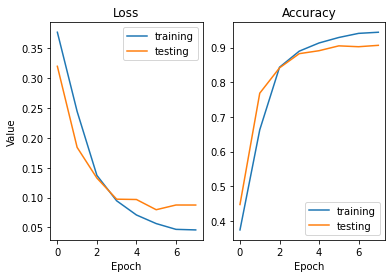

In [12]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# plot accuracy during training
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix - MLP Model',
                          cmap=plt.cm.Blues, figsize=(12,12)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np

def To_categorie(X_test):
  #y_pred = load_model.predict(X_test)
  y_pred=[]
  y_pred=(np.around(X_test))
  y_Pred=[]
  for i in range(0,len(y_pred)):
      y_Pred.append(np.argmax(y_pred[i]))
  return y_Pred
y_Pred=To_categorie(model(padded_test))


Normalized confusion matrix


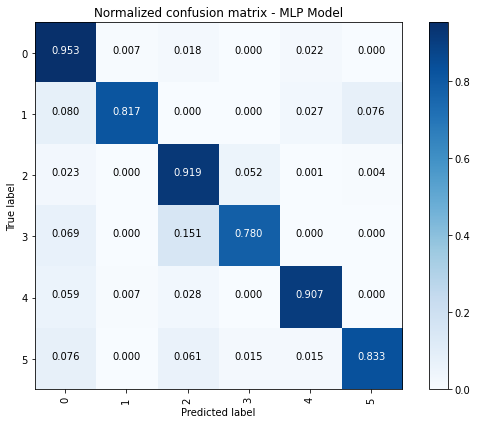

In [14]:
from sklearn.metrics import confusion_matrix
# Plot normalized confusion matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(To_categorie(y_test), y_Pred)
np.set_printoptions(precision=2)

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5], normalize=True,
                      title='Normalized confusion matrix - MLP Model')
plt.savefig("./Normalized Confusion Matrix - MLP MODEL.png")
plt.show()